In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import torch
from data_parser import data_loader_full
import io
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [2]:
class CPU_Unpickler(pickle.Unpickler):
    def find_class(self, module, name):
        if module == 'torch.storage' and name == '_load_from_bytes':
            return lambda b: torch.load(io.BytesIO(b), map_location='cpu')
        else:
            return super().find_class(module, name)

file_path = 'Predicted/results.pkl'
with open(file_path, 'rb') as pickle_file:
    pred = CPU_Unpickler(pickle_file).load()

In [3]:
data_occupancy_all, data_flow_all, data_speed_all = data_loader_full()
X_occu_all, y_occu_all = data_occupancy_all[:, :2], data_occupancy_all[:, 2]
X_occu_all, y_occu_all = torch.tensor(X_occu_all, dtype=torch.float32, requires_grad=True), torch.tensor(y_occu_all, dtype=torch.float32).unsqueeze(1)

In [4]:
pred_occu = pred['occupancy_recon'].to(torch.device('cpu'))
pred_flow = pred['flow_recon'].to(torch.device('cpu'))
pred_speed = pred['speed_recon'].to(torch.device('cpu'))

pred_k_t = pred['k_t'].to(torch.device('cpu'))

pred_k_x = pred['k_x'].to(torch.device('cpu'))
pred_q_x = pred['q_x'].to(torch.device('cpu'))
pred_v_x = pred['v_x'].to(torch.device('cpu'))
pred_k_t_predict = pred['k_t_predict'].to(torch.device('cpu'))

pred_k_xx = pred['k_xx'].to(torch.device('cpu'))
pred_q_xx = pred['q_xx'].to(torch.device('cpu'))
pred_v_xx = pred['v_xx'].to(torch.device('cpu'))

In [5]:
occupancy_recon = torch.cat((X_occu_all, pred_occu), dim=1).detach().numpy()
flow_recon = torch.cat((X_occu_all, pred_flow), dim=1).detach().numpy()
speed_recon = torch.cat((X_occu_all, pred_speed), dim=1).detach().numpy()

k_t = torch.cat((X_occu_all, pred_k_t), dim=1).detach().numpy()
k_x = torch.cat((X_occu_all,pred_k_x), dim=1).detach().numpy()
q_x = torch.cat((X_occu_all, pred_q_x), dim=1).detach().numpy()
v_x = torch.cat((X_occu_all, pred_v_x), dim=1).detach().numpy()

k_xx = torch.cat((X_occu_all,pred_k_xx), dim=1).detach().numpy()
q_xx = torch.cat((X_occu_all, pred_q_xx), dim=1).detach().numpy()
v_xx = torch.cat((X_occu_all, pred_v_xx), dim=1).detach().numpy()

k_t_predict = torch.cat((X_occu_all, pred_k_t_predict), dim=1).detach().numpy()

occupancy_recon = pd.DataFrame(occupancy_recon, columns = ['TimeStep','Station_Number','Occupancy'])
flow_recon = pd.DataFrame(flow_recon, columns = ['TimeStep','Station_Number','Flow'])
speed_recon = pd.DataFrame(speed_recon, columns = ['TimeStep','Station_Number','Speed'])

k_t = pd.DataFrame(k_t, columns = ['TimeStep','Station_Number','k_t'])

k_x = pd.DataFrame(k_x, columns = ['TimeStep', 'Station_Number', 'k_x'])
q_x = pd.DataFrame(q_x, columns = ['TimeStep', 'Station_Number', 'q_x'])
v_x = pd.DataFrame(v_x, columns = ['TimeStep', 'Station_Number', 'v_x'])

k_xx = pd.DataFrame(k_xx, columns = ['TimeStep', 'Station_Number', 'k_xx'])
q_xx = pd.DataFrame(q_xx, columns = ['TimeStep', 'Station_Number', 'q_xx'])
v_xx = pd.DataFrame(v_xx, columns = ['TimeStep', 'Station_Number', 'v_xx'])

k_t_predict = pd.DataFrame(k_t_predict, columns=['TimeStep', 'Station_Number', 'k_t'])

In [6]:
Flow = pd.read_csv('Data_Clean/Flow_all.csv',index_col='Station_PM')
Occupancy = pd.read_csv('Data_Clean/Occupancy_all.csv',index_col='Station_PM')
Speed = pd.read_csv('Data_Clean/Speed_all.csv',index_col='Station_PM')

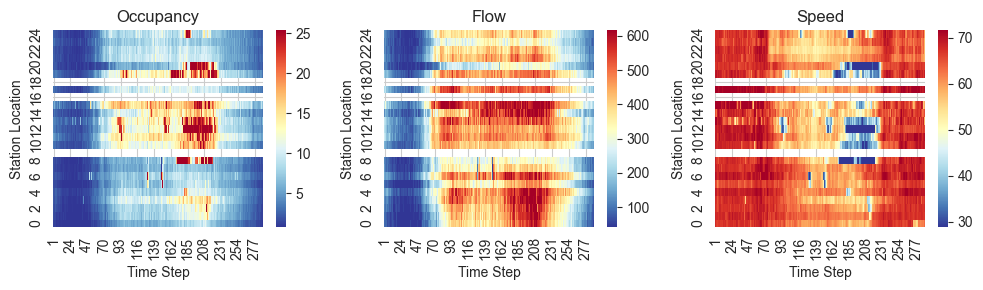

In [7]:
fig, axs = plt.subplots(1, 3, figsize=(10, 3))

# y_tick_positions = range(10, 288, 10)  # Adjust as needed
# y_tick_labels = [str(val) for val in y_tick_positions]

sns.heatmap(100*Occupancy.iloc[:,:288].iloc[::-1], cmap="RdYlBu_r", annot=False, robust=True, ax=axs[0])
axs[0].set_ylabel('Station Location')
axs[0].set_xlabel('Time Step')
axs[0].set_title("Occupancy")

sns.heatmap(Flow.iloc[:,:288].iloc[::-1], cmap="RdYlBu_r", annot=False,robust=True, ax=axs[1])
axs[1].set_ylabel('Station Location')
axs[1].set_xlabel('Time Step')
axs[1].set_title("Flow")

sns.heatmap(Speed.iloc[:,:288].iloc[::-1], cmap="RdYlBu_r", annot=False,robust=True, ax=axs[2])
axs[2].set_ylabel('Station Location')
axs[2].set_xlabel('Time Step')
axs[2].set_title("Speed")


plt.rcParams['font.family'] = 'Times New Roman'
plt.tight_layout()
plt.show()

fig.savefig("Figures/Heatmap.png", dpi = 300)

In [8]:
Flow_ori = pd.read_csv('Data_Clean/Flow.csv',index_col='Station_PM')
Occupancy_ori = pd.read_csv('Data_Clean/Occupancy.csv',index_col='Station_PM')
Speed_ori = pd.read_csv('Data_Clean/Speed.csv',index_col='Station_PM')

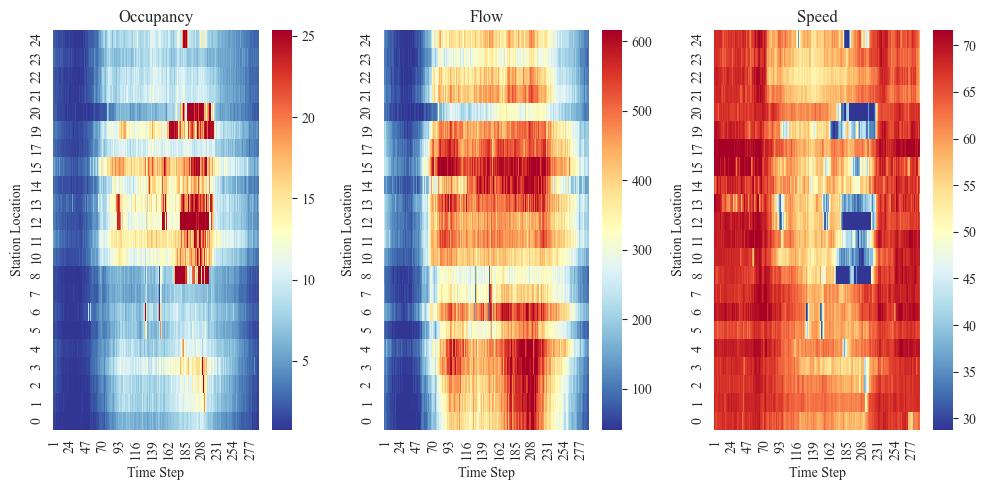

In [9]:
fig, axs = plt.subplots(1, 3, figsize=(10, 5))

# y_tick_positions = range(10, 288, 10)  # Adjust as needed
# y_tick_labels = [str(val) for val in y_tick_positions]

sns.heatmap(100*Occupancy_ori.iloc[:,:288].iloc[::-1], cmap="RdYlBu_r", annot=False, robust=True, ax=axs[0])
axs[0].set_ylabel('Station Location')
axs[0].set_xlabel('Time Step')
axs[0].set_title("Occupancy")

sns.heatmap(Flow_ori.iloc[:,:288].iloc[::-1], cmap="RdYlBu_r", annot=False,robust=True, ax=axs[1])
axs[1].set_ylabel('Station Location')
axs[1].set_xlabel('Time Step')
axs[1].set_title("Flow")

sns.heatmap(Speed_ori.iloc[:,:288].iloc[::-1], cmap="RdYlBu_r", annot=False,robust=True, ax=axs[2])
axs[2].set_ylabel('Station Location')
axs[2].set_xlabel('Time Step')
axs[2].set_title("Speed")

plt.rcParams['font.family'] = 'Times New Roman'
plt.tight_layout()
plt.show()

fig.savefig("Figures/Heatmap_without.png", dpi = 300)

## Plot Reconstructed Data

In [10]:
occupancy_recon['TimeStep'] = occupancy_recon['TimeStep'].astype(int)
occupancy_recon['Station_Number'] = occupancy_recon['Station_Number'].astype(int)
flow_recon['TimeStep'] = flow_recon['TimeStep'].astype(int)
flow_recon['Station_Number'] = flow_recon['Station_Number'].astype(int)
speed_recon['TimeStep'] = speed_recon['TimeStep'].astype(int)
speed_recon['Station_Number'] = speed_recon['Station_Number'].astype(int)

In [11]:
occupancy_recon_wide = occupancy_recon.pivot(index='Station_Number', columns='TimeStep', values='Occupancy')
flow_recon_wide = flow_recon.pivot(index='Station_Number', columns='TimeStep', values='Flow')
speed_recon_wide = speed_recon.pivot(index='Station_Number', columns='TimeStep', values='Speed')

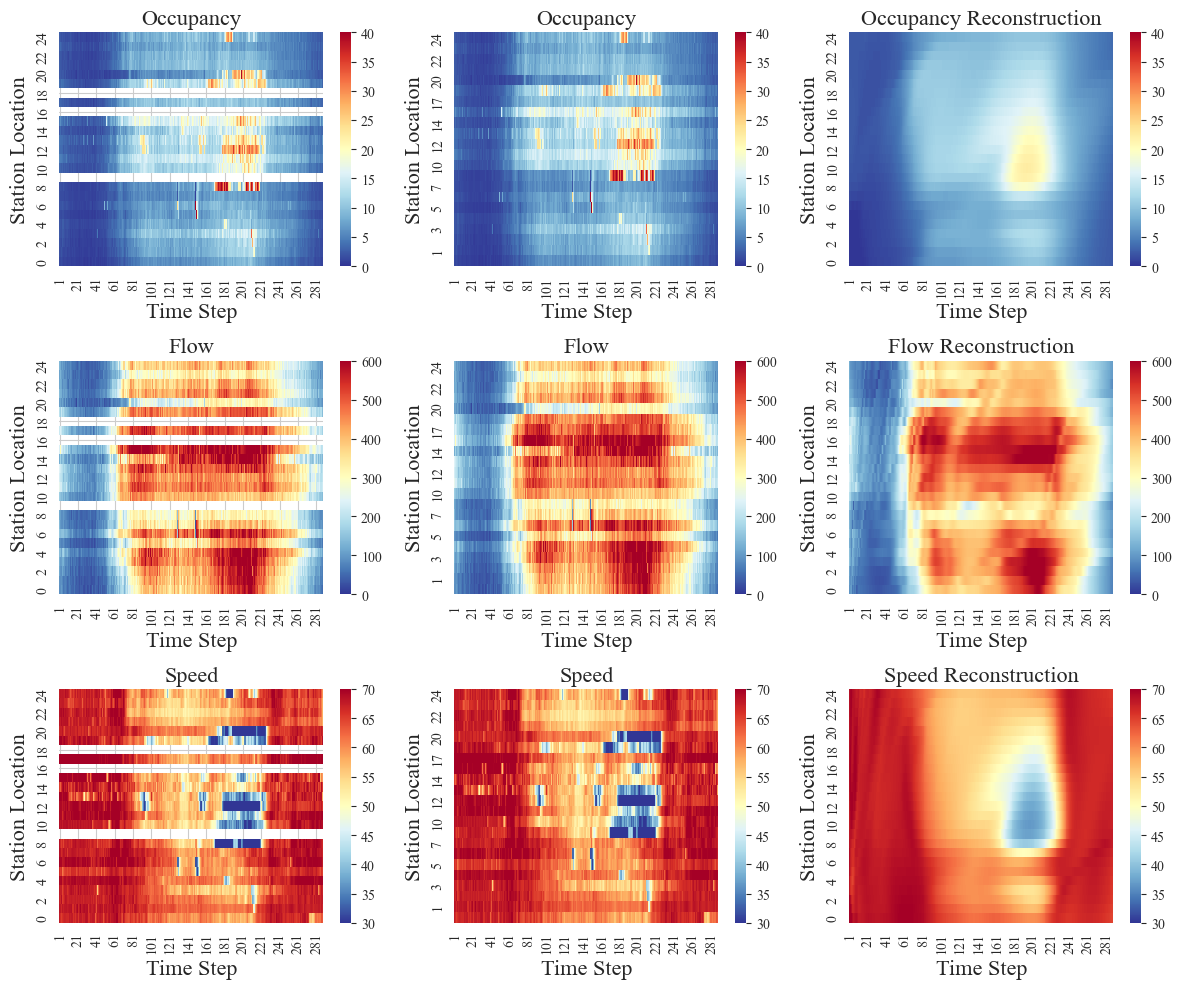

In [12]:
fig, axs = plt.subplots(3, 3, figsize=(12, 10))

vmin1_occu, vmax1_occu = 0, 40

sns.heatmap(100*Occupancy.iloc[:,:288].iloc[::-1], cmap="RdYlBu_r", vmin=vmin1_occu, vmax=vmax1_occu, annot=False, ax=axs[0,0])
axs[0,0].set_ylabel('Station Location', fontsize = 16)
axs[0,0].set_xlabel('Time Step',  fontsize = 16)
axs[0,0].set_title("Occupancy",  fontsize = 16)

sns.heatmap(100*Occupancy_ori.iloc[:,:288].iloc[::-1], cmap="RdYlBu_r", vmin=vmin1_occu, vmax=vmax1_occu, annot=False, ax=axs[0,1])
axs[0,1].set_ylabel('Station Location', fontsize = 16)
axs[0,1].set_xlabel('Time Step',  fontsize = 16)
axs[0,1].set_title("Occupancy",  fontsize = 16)


sns.heatmap(occupancy_recon_wide.iloc[::-1], cmap="RdYlBu_r", vmin=vmin1_occu, vmax=vmax1_occu, annot=False, ax=axs[0,2])
axs[0,2].set_ylabel('Station Location',  fontsize = 16)
axs[0,2].set_xlabel('Time Step',  fontsize = 16)
axs[0,2].set_title("Occupancy Reconstruction",  fontsize = 16)

vmin1_flow, vmax1_flow = 0, 600

sns.heatmap(Flow.iloc[:,:288].iloc[::-1], cmap="RdYlBu_r", vmin=vmin1_flow, vmax=vmax1_flow, annot=False, ax=axs[1,0])
axs[1,0].set_ylabel('Station Location',  fontsize = 16)
axs[1,0].set_xlabel('Time Step',  fontsize = 16)
axs[1,0].set_title("Flow",  fontsize = 16)

sns.heatmap(Flow_ori.iloc[:,:288].iloc[::-1], cmap="RdYlBu_r", vmin=vmin1_flow, vmax=vmax1_flow, annot=False, ax=axs[1,1])
axs[1,1].set_ylabel('Station Location',  fontsize = 16)
axs[1,1].set_xlabel('Time Step',  fontsize = 16)
axs[1,1].set_title("Flow",  fontsize = 16)

sns.heatmap(flow_recon_wide.iloc[::-1], cmap="RdYlBu_r", vmin=vmin1_flow, vmax=vmax1_flow, annot=False, ax=axs[1,2])
axs[1,2].set_ylabel('Station Location',  fontsize = 16)
axs[1,2].set_xlabel('Time Step',  fontsize = 16)
axs[1,2].set_title("Flow Reconstruction",  fontsize = 16)

vmin1_speed, vmax1_speed = 30, 70

sns.heatmap(Speed.iloc[:,:288].iloc[::-1], cmap="RdYlBu_r", vmin=vmin1_speed, vmax=vmax1_speed, annot=False, ax=axs[2,0])
axs[2,0].set_ylabel('Station Location',  fontsize = 16)
axs[2,0].set_xlabel('Time Step',  fontsize = 16)
axs[2,0].set_title("Speed",  fontsize = 16)

sns.heatmap(Speed_ori.iloc[:,:288].iloc[::-1], cmap="RdYlBu_r", vmin=vmin1_speed, vmax=vmax1_speed, annot=False, ax=axs[2,1])
axs[2,1].set_ylabel('Station Location',  fontsize = 16)
axs[2,1].set_xlabel('Time Step',  fontsize = 16)
axs[2,1].set_title("Speed",  fontsize = 16)

sns.heatmap(speed_recon_wide.iloc[::-1], cmap="RdYlBu_r", vmin=vmin1_speed, vmax=vmax1_speed, annot=False, ax=axs[2,2])
axs[2,2].set_ylabel('Station Location',  fontsize = 16)
axs[2,2].set_xlabel('Time Step',  fontsize = 16)
axs[2,2].set_title("Speed Reconstruction",  fontsize = 16)

plt.rcParams['font.family'] = 'Times New Roman'
plt.tight_layout()
plt.show()

fig.savefig("Figures/Heatmap_all.png", dpi = 300)

In [13]:
flow_recon_wide

TimeStep,1,2,3,4,5,6,7,8,9,10,...,279,280,281,282,283,284,285,286,287,288
Station_Number,,,,,,,,,,,,,,,,,,,,,
0,95.627556,98.628670,104.767471,65.243958,79.156174,64.668541,70.758934,40.042175,48.753128,57.658680,...,114.374146,110.054504,105.739243,101.373894,96.912437,92.352417,87.772476,83.309547,79.066917,75.046288
1,104.834816,90.139603,102.508759,83.322701,93.640404,64.349083,77.269981,59.647579,54.883865,57.792141,...,114.229103,110.003853,105.794846,101.550186,97.227242,92.824593,88.412399,84.113075,80.025307,76.160591
2,114.192039,84.820099,97.988770,114.068039,93.282684,87.136620,73.789261,80.337067,70.742195,57.608326,...,115.485184,111.151756,106.887726,102.635857,98.347412,94.008781,89.671906,85.444527,81.429733,77.656471
3,149.158142,117.267372,100.136566,127.133011,124.692337,96.956268,85.912544,93.466835,90.523392,90.383728,...,133.297821,125.807304,118.916977,112.493690,106.357666,100.336090,94.319237,88.391884,82.814041,77.744751
4,145.738388,120.329811,88.162018,129.968719,118.736763,104.773163,96.744469,93.672272,104.350800,111.669060,...,178.480865,172.419037,166.420456,160.429932,154.377213,148.183746,141.793671,135.240082,128.653000,122.132378
5,125.615150,111.670738,86.440353,118.440247,141.265182,114.205605,102.656746,99.487396,88.628448,90.823311,...,153.156616,147.533432,141.901123,136.274139,130.728928,125.352272,120.174316,115.160667,110.245697,105.352890
6,147.672882,116.630257,95.243179,149.494751,130.147598,129.454330,115.740761,109.320816,112.211830,99.195305,...,139.280533,133.334152,127.600227,122.134956,116.912201,111.856461,106.878357,101.882706,96.780403,91.541496
7,133.002090,110.102715,98.681801,62.951614,94.521019,90.224915,79.823807,71.384346,70.489365,75.798042,...,141.894150,136.153259,130.735596,125.664162,120.893234,116.351997,111.973618,107.698868,103.469917,99.226715
8,123.926765,111.884750,101.833969,83.767181,107.229591,79.021675,75.675026,68.670074,59.404465,54.408676,...,138.239334,133.234924,128.544357,124.162766,120.084358,116.291862,112.753716,109.428566,106.272240,103.240402


In [14]:
k_t['TimeStep'] = k_t['TimeStep'].astype(int)
k_t['Station_Number'] = k_t['Station_Number'].astype(int)

k_t_predict['TimeStep'] = k_t_predict['TimeStep'].astype(int)
k_t_predict['Station_Number'] = k_t_predict['Station_Number'].astype(int)

k_x['TimeStep'] = k_x['TimeStep'].astype(int)
k_x['Station_Number'] = k_x['Station_Number'].astype(int)

q_x['TimeStep'] = q_x['TimeStep'].astype(int)
q_x['Station_Number'] = q_x['Station_Number'].astype(int)

v_x['TimeStep'] = v_x['TimeStep'].astype(int)
v_x['Station_Number'] = v_x['Station_Number'].astype(int)

In [15]:
k_t_wide = k_t.pivot(index='Station_Number', columns='TimeStep', values='k_t')
k_t_predict_wide = k_t_predict.pivot(index='Station_Number', columns='TimeStep', values='k_t')

k_x_wide = k_x.pivot(index='Station_Number', columns='TimeStep', values='k_x')

q_x_wide = q_x.pivot(index='Station_Number', columns='TimeStep', values='q_x')

v_x_wide = v_x.pivot(index='Station_Number', columns='TimeStep', values='v_x')

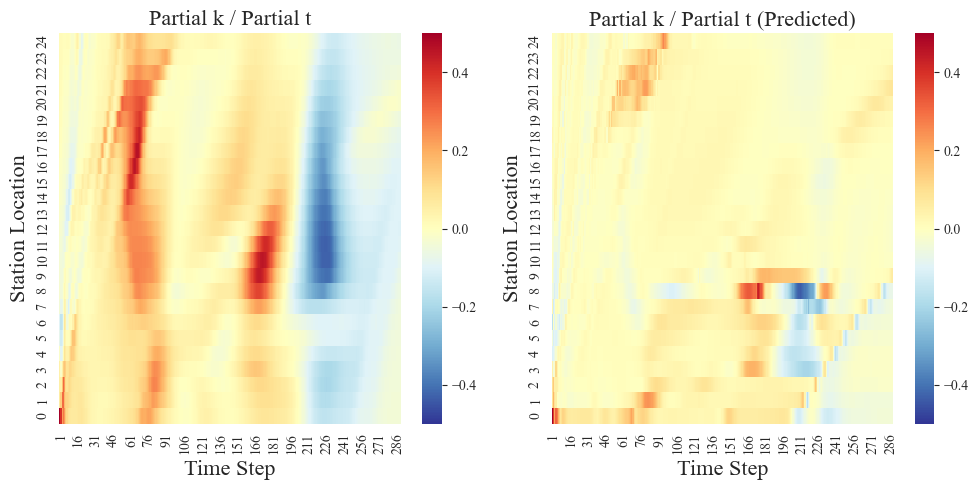

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

vmin, vmax = -0.5, 0.5
sns.heatmap(k_t_wide.iloc[::-1], cmap="RdYlBu_r", vmin=vmin, vmax=vmax, annot=False, robust=True, ax=axs[0])
axs[0].set_ylabel('Station Location',  fontsize = 16)
axs[0].set_xlabel('Time Step',  fontsize = 16)
axs[0].set_title("Partial k / Partial t",  fontsize = 16)

sns.heatmap(k_t_predict_wide.iloc[::-1], cmap="RdYlBu_r", vmin=vmin, vmax=vmax, annot=False,robust=True, ax=axs[1])
axs[1].set_ylabel('Station Location',  fontsize = 16)
axs[1].set_xlabel('Time Step',  fontsize = 16)
axs[1].set_title("Partial k / Partial t (Predicted)",  fontsize = 16)

plt.rcParams['font.family'] = 'Times New Roman'
plt.tight_layout()
plt.show()

fig.savefig("Figures/k_dev.png", dpi = 300)

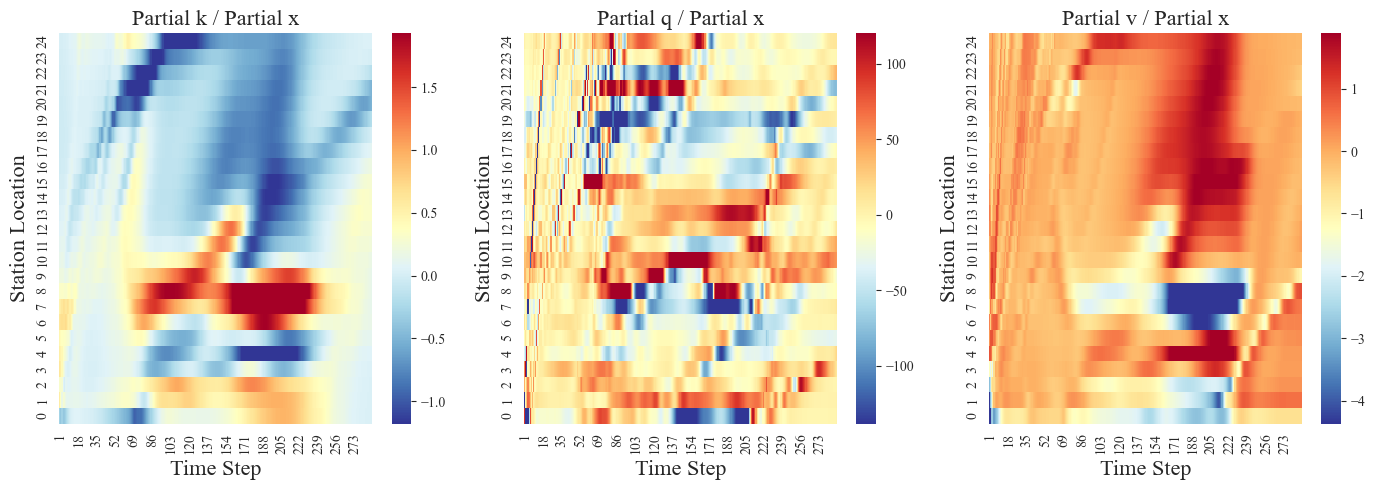

In [17]:
fig, axs = plt.subplots(1, 3, figsize=(14, 5))

sns.heatmap(k_x_wide.iloc[::-1], cmap="RdYlBu_r", annot=False,robust=True, ax=axs[0])
axs[0].set_ylabel('Station Location',  fontsize = 16)
axs[0].set_xlabel('Time Step',  fontsize = 16)
axs[0].set_title("Partial k / Partial x",  fontsize = 16)

sns.heatmap(q_x_wide.iloc[::-1], cmap="RdYlBu_r", annot=False,robust=True, ax=axs[1])
axs[1].set_ylabel('Station Location',  fontsize = 16)
axs[1].set_xlabel('Time Step',  fontsize = 16)
axs[1].set_title("Partial q / Partial x",  fontsize = 16)

sns.heatmap(v_x_wide.iloc[::-1], cmap="RdYlBu_r", annot=False,robust=True, ax=axs[2])
axs[2].set_ylabel('Station Location',  fontsize = 16)
axs[2].set_xlabel('Time Step',  fontsize = 16)
axs[2].set_title("Partial v / Partial x",  fontsize = 16)

plt.rcParams['font.family'] = 'Times New Roman'
plt.tight_layout()
plt.show()

fig.savefig("Figures/qv_dev.png", dpi = 300)

In [18]:
k_xx['TimeStep'] = k_xx['TimeStep'].astype(int)
k_xx['Station_Number'] = k_xx['Station_Number'].astype(int)

q_xx['TimeStep'] = q_xx['TimeStep'].astype(int)
q_xx['Station_Number'] = q_xx['Station_Number'].astype(int)

v_xx['TimeStep'] = v_xx['TimeStep'].astype(int)
v_xx['Station_Number'] = v_xx['Station_Number'].astype(int)

In [19]:
k_xx_wide = k_xx.pivot(index='Station_Number', columns='TimeStep', values='k_xx')

q_xx_wide = q_xx.pivot(index='Station_Number', columns='TimeStep', values='q_xx')

v_xx_wide = v_xx.pivot(index='Station_Number', columns='TimeStep', values='v_xx')

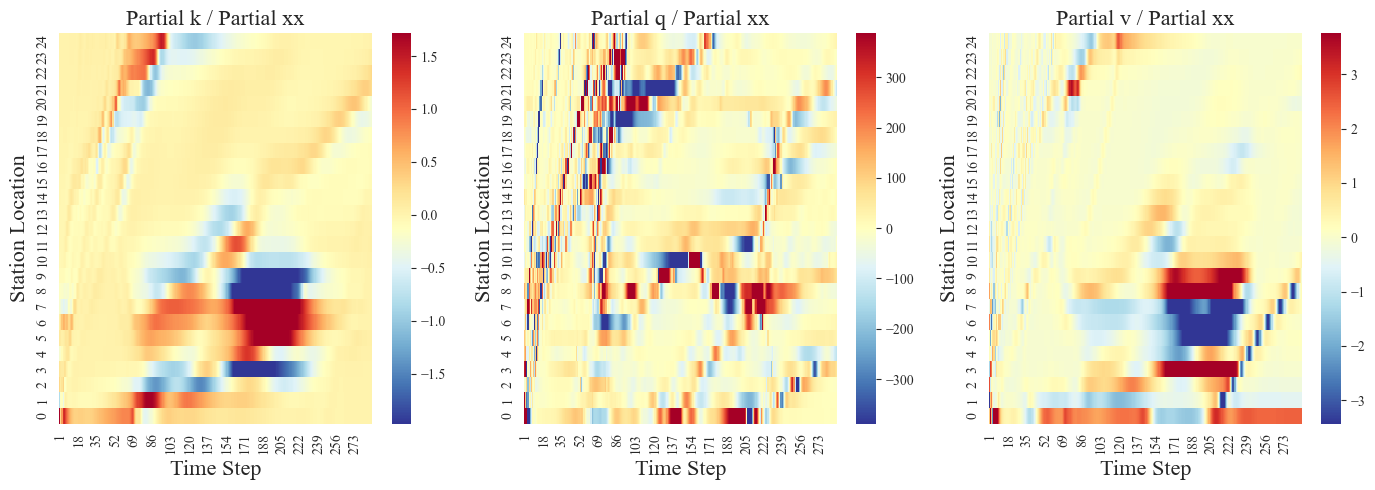

In [20]:
fig, axs = plt.subplots(1, 3, figsize=(14, 5))

sns.heatmap(k_xx_wide.iloc[::-1], cmap="RdYlBu_r", annot=False,robust=True, ax=axs[0])
axs[0].set_ylabel('Station Location',  fontsize = 16)
axs[0].set_xlabel('Time Step',  fontsize = 16)
axs[0].set_title("Partial k / Partial xx",  fontsize = 16)

sns.heatmap(q_xx_wide.iloc[::-1], cmap="RdYlBu_r", annot=False,robust=True, ax=axs[1])
axs[1].set_ylabel('Station Location',  fontsize = 16)
axs[1].set_xlabel('Time Step',  fontsize = 16)
axs[1].set_title("Partial q / Partial xx",  fontsize = 16)

sns.heatmap(v_xx_wide.iloc[::-1], cmap="RdYlBu_r", annot=False,robust=True, ax=axs[2])
axs[2].set_ylabel('Station Location',  fontsize = 16)
axs[2].set_xlabel('Time Step',  fontsize = 16)
axs[2].set_title("Partial v / Partial xx",  fontsize = 16)

plt.rcParams['font.family'] = 'Times New Roman'
plt.tight_layout()
plt.show()

fig.savefig("Figures/qv_dev2.png", dpi = 300)

In [21]:
pred['coefficients']

tensor([[ 1.5373e-03],
        [ 0.0000e+00],
        [-0.0000e+00],
        [-0.0000e+00],
        [-6.8059e-02],
        [ 0.0000e+00],
        [-7.2950e-02],
        [ 2.9059e-02],
        [ 0.0000e+00],
        [ 0.0000e+00],
        [ 0.0000e+00],
        [-0.0000e+00],
        [-0.0000e+00],
        [-0.0000e+00],
        [-0.0000e+00],
        [ 2.1836e-03],
        [ 0.0000e+00],
        [-0.0000e+00],
        [ 0.0000e+00],
        [-0.0000e+00],
        [-0.0000e+00],
        [-0.0000e+00],
        [-0.0000e+00],
        [-0.0000e+00],
        [-0.0000e+00],
        [-0.0000e+00],
        [ 0.0000e+00],
        [ 0.0000e+00],
        [ 0.0000e+00],
        [-0.0000e+00],
        [-0.0000e+00],
        [ 0.0000e+00],
        [-0.0000e+00],
        [ 0.0000e+00],
        [-0.0000e+00],
        [-0.0000e+00],
        [-0.0000e+00],
        [-2.7525e-02],
        [-0.0000e+00],
        [-2.6936e-02],
        [ 0.0000e+00],
        [ 0.0000e+00],
        [-0.0000e+00],
        [-0